# CIFAR10 Keras (From Sequential to Functional)
## Setup

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from keras.datasets import cifar10 

## Load CIFAR10 Dataset

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

## Check number of categories present in the dataset

In [3]:
num_labels = len(np.unique(y_train)) 
num_labels # There are 10 categories within y_train

10

## Convert Categories to One-Hot Vectors

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Initialize Input Node

In [5]:
image_size = x_train.shape[1]
input_size = image_size * image_size * 3
# Flatten (or you may also do x = Flatten()(input))
x_train = np.reshape(x_train,[-1,input_size])
x_test = np.reshape(x_test,[-1,input_size])
# Normalize
x_train = x_train.astype('float32')/255 # Models perform better when normalized
x_test = x_test.astype('float32')/255

## Set Hyperparameters

In [6]:
batch_size = 128 # Arbitrary (2^n)
hidden_units = 256 
dropout = 0.45 # Determines the probability of allowing some signals to go thru an activation layer

## Build Keras Functional Model

In [7]:
model_input = Input(shape=(input_size))
model = Dense(hidden_units, activation='relu')(model_input)
model = Dense(hidden_units, activation='relu')(model)
model_output = Dense(num_labels, activation='softmax')(model)
model = keras.Model(inputs=model_input, outputs=model_output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


## Model Execution and Evaluation

In [8]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 40, batch_size = batch_size)

test_scores = model.evaluate(x_test, y_test, verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/40
391/391 [==============================] - 4s 6ms/step - loss: 1.8648 - accuracy: 0.3287 - val_loss: 1.7072 - val_accuracy: 0.3891
Epoch 2/40
391/391 [==============================] - 2s 5ms/step - loss: 1.6739 - accuracy: 0.4009 - val_loss: 1.6276 - val_accuracy: 0.4159
Epoch 3/40
391/391 [==============================] - 2s 5ms/step - loss: 1.5903 - accuracy: 0.4298 - val_loss: 1.5588 - val_accuracy: 0.4454
Epoch 4/40
391/391 [==============================] - 2s 5ms/step - loss: 1.5378 - accuracy: 0.4510 - val_loss: 1.5703 - val_accuracy: 0.4385
Epoch 5/40
391/391 [==============================] - 2s 5ms/step - loss: 1.4893 - accuracy: 0.4674 - val_loss: 1.5150 - val_accuracy: 0.4617
Epoch 6/40
391/391 [==============================] - 2s 5ms/step - loss: 1.4639 - accuracy: 0.4789 - val_loss: 1.4811 - val_accuracy: 0.4814
Epoch 7/40
391/391 [==============================] - 2s 5ms/step - loss: 1.4308 - accuracy: 0.4895 - val_loss: 1.4480 - val_accuracy: 0.4789
Epoch 

## Plotting the Model's Performance

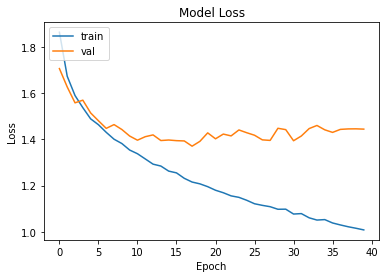

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','val'],loc='upper left')
plt.show()